# DATA 5002 – Data Exploration  
### Assignment 2 – Football Player Shooting Analysis  

**Student Name:** Robert Parkes 
**Student ID:** A00050464  
**Date:** November 2025  

## Part 1 – Dataset Overview & Inspection

The dataset I have chosen to use for this assignment is from the **2023–2024 Premier League season** and contains information about all the players. It focuses on shooting statistics for each player that season, including metrics such as goals, shots, accuracy, and conversion rates. I found this dataset on **Kaggle (“EPL Player Shooting Stats 23–24 Premier League”)** and made some changes to it to suit the project. 

With this dataset, my aim is to explore player performance, fix data quality issues, and create new insights and visualisations using Python. To adapt it for this project, I used ChatGPT to intentionally modify the dataset by adding missing values, duplicate rows, and inconsistent date formats, in order to demonstrate my skills in data cleaning and preparation. This dataset represents a typical real-world scenario where raw sports data can contain irregularities.  

In [2]:
# Step 1 – Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2 – Load Dataset
file_path = "player_shooting_2023_2024_messy copy.csv"
df = pd.read_csv(file_path)

# Step 3 – Preview the Data
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}\n")

print("Column names:")
print(df.columns.tolist())

print("\nBasic Information:")
df.info()

# Show first and last few rows
display(df.head(20))
display(df.tail(20))

Number of rows: 1168
Number of columns: 25

Column names:
['Unnamed: 0', 'Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', '90s', 'Gls', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK', 'PK', 'PKatt', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'Date_of_Birth']

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1168 non-null   float64
 1   Rk             1168 non-null   object 
 2   Player         1168 non-null   object 
 3   Nation         1168 non-null   object 
 4   Pos            1168 non-null   object 
 5   Squad          1168 non-null   object 
 6   Age            1124 non-null   float64
 7   90s            1124 non-null   float64
 8   Gls            1124 non-null   float64
 9   Sh             1124 non-null   float64
 10  SoT            1124 non-null   float64
 11  SoT%           914 non-n

,Unnamed: 0,Rk,Player,Nation,Pos,Squad,Age,90s,Gls,Sh,...,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,Date_of_Birth
0,0.000000,1,Max Aarons,ENG,DF,Bournemouth Jr.,23.027193,10.210691,0.000000,1.152585,...,NaN,20.914079,0.000000,0.000000,0.000000,0.000000,0.000000,0.019900,0.000000,07/12/1986
1,569.167605,529 II,Fabio Vieira II,POR Sr.,"MF,FW II",Arsenal II,25.411194,2.952898,0.826268,4.654373,...,0.000000,19.345173,0.000000,0.975437,1.008768,1.077428,0.370289,0.078059,-0.187152,19-03-1993
2,429.000000,414,Ivan Perišić,CRO,FW,Tottenham,35.000000,1.100000,0.000000,2.000000,...,NaN,13.000000,0.000000,0.000000,0.000000,0.100000,0.100000,0.060000,-0.100000,"July 23, 1982"
3,148.727789,179 Sr.,Evan Ferguson Sr.,IRL II,FW,Brighton Jr.,22.721758,16.183710,6.313286,34.450052,...,0.287952,13.913030,0.000000,0.000000,0.000000,4.514368,3.881311,0.127974,1.614231,11/08/1996
4,308.000000,298,Keane Lewis-Potter,ENG,"DF,FW",Brentford,23.000000,13.400000,2.000000,33.000000,...,0.140000,12.900000,0.000000,0.000000,0.000000,4.300000,4.300000,0.130000,-2.300000,"September 14, 2000"
5,110.000000,107,Nathaniel Clyne,ENG,"DF,MF",Crystal Palace,33.000000,8.200000,0.000000,2.000000,...,NaN,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,"October 24, 1990"
6,7.000000,8,Brandon Aguilera,CRC,FW,Nott'ham Forest,20.000000,0.100000,0.000000,0.000000,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,31-12-2005
7,404.897804,410 Jr.,Myles Peart-Harris Sr.,ENG II,"DF,MF",Brentford Sr.,19.706045,0.082103,0.000000,0.000000,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,"October 13, 1995"
8,336.000000,325,Remi Matthews,ENG,GK,Crystal Palace,30.000000,0.000000,0.000000,0.000000,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,09/04/1983
9,415.000000,Rk,Player,N,Pos,Squad,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20-04-1993


,Unnamed: 0,Rk,Player,Nation,Pos,Squad,Age,90s,Gls,Sh,...,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,Date_of_Birth
1148,71.810021,73 Sr.,Armando Broja Jr.,ALB Sr.,FW Sr.,Chelsea,22.851058,4.691225,1.103895,13.474114,...,0.476582,10.975241,0.000000,0.000000,0.000000,2.802200,2.735732,0.165283,-1.574775,21-07-1984
1149,148.000000,144,Ben Doak,SCO,FW,Liverpool,18.000000,0.200000,0.000000,0.000000,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,"December 22, 2004"
1150,410.000000,396,Stefan Ortega,GER,GK,Manchester City,31.000000,5.300000,0.000000,0.000000,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,"December 14, 1999"
1151,45.000000,45,Harvey Barnes,ENG,FW,Newcastle Utd,26.000000,5.600000,4.000000,19.000000,...,0.440000,17.500000,0.000000,0.000000,0.000000,2.600000,2.600000,0.130000,1.400000,18 Jan 1989
1152,615.970661,499,Luke Thomas Sr.,ENG Jr.,DF,Sheffield Utd Jr.,21.341883,11.624611,0.000000,6.797616,...,0.000000,16.857255,0.000000,0.000000,0.000000,0.538704,0.529909,0.073600,-0.547328,2001-08-02
1153,440.412771,387 Jr.,Robin Olsen II,SWE Sr.,GK Sr.,Aston Villa II,39.315415,1.675112,0.000000,0.000000,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,"July 25, 1983"
1154,183.000000,177,Ansu Fati,ESP,"MF,FW",Brighton,21.000000,5.500000,2.000000,23.000000,...,0.200000,14.300000,0.000000,0.000000,0.000000,3.300000,3.300000,0.140000,-1.300000,02/07/1981
1155,407.125000,330 Jr.,James Mcatee II,ENG II,"MF,FW II",Sheffield Utd,17.629011,20.989594,2.737835,25.855237,...,0.258474,19.220250,2.028959,0.971994,0.823415,3.357131,2.189455,0.088926,0.116229,10/03/2003
1156,192.274278,Rk Jr.,Player II,N II,Pos Sr.,Squad II,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980-06-27
1157,181.000000,Rk,Player,N,Pos,Squad,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26/05/2002


In [3]:
# Step 4 – Check for Issues
print("\n Missing values per column:")
print(df.isna().sum())

print(f"\n Number of duplicate rows: {df.duplicated().sum()}")

print("\nSample of Date_of_Birth values:")
print(df['Date_of_Birth'].sample(10, random_state=1))


 Missing values per column:
Unnamed: 0         0
Rk                 0
Player             0
Nation             0
Pos                0
Squad              0
Age               44
90s               44
Gls               44
Sh                44
SoT               44
SoT%             254
Sh/90             44
SoT/90            44
G/Sh             254
G/SoT            378
Dist             254
FK                44
PK                44
PKatt             44
xG                44
npxG              44
npxG/Sh          254
G-xG              44
Date_of_Birth      0
dtype: int64

 Number of duplicate rows: 0

Sample of Date_of_Birth values:
457      04-04-1989
309      06-11-1986
216      31/01/1992
969      1997-07-21
525      16/06/2001
1167     1997-06-26
664      18/05/1984
1004     11-12-1999
537     02 Sep 1981
731      2004-09-15
Name: Date_of_Birth, dtype: object


### Summary of Initial Inspection

The dataset was successfully loaded, and we can see it contains **1,168 rows** and **25 columns**.  
Within this, there are both numeric and categorical variables related to the shooting statistics of players from the 2023–2024 season.  

**Key issues identified:**
- There are some missing values in numerical columns such as `SoT%`, `G/Sh`, and `G/SoT`.  
- There is a column named `Unnamed: 0`, which will need to be removed.  
- The `Date_of_Birth` column contains many different date formats.  
- We found there were some duplicated rows.  

In Part 2 of this assignment, *“Data Cleaning and Preparation,”* we will address these issues.

## Part 2 – Data Cleaning and Preparation

This part of the assignment focuses on cleaning and preparing the data for analysis.  
I made sure that all the issues listed in Part 1 were fixed so that the dataset is properly formatted, all missing values are handled, and any inconsistencies are corrected.

### Overview of Cleaning Tasks

I chose to change the Date_of_Birth column into the same date format because the original dataset used lots of different formats, and this made everything inconsistent.

The following issues were addressed:
- Removed any unnecessary or unnamed columns.  
- Found and handled any missing values.  
- Made sure all dates were in a consistent format.  
- Checked for duplicate rows.  

In [4]:
# Step 1 – Copy the original DataFrame
df_cleaned = df.copy()

# Step 2 – Remove any unnamed or extra columns
if 'Unnamed: 0' in df_cleaned.columns:
    df_cleaned.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
# Step 3 – Check for missing values
print("\nMissing values per column before cleaning:")
print(df_cleaned.isna().sum())

# Step 4 – Fill missing values with column mean
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns
for col in numeric_cols:
    mean_val = df_cleaned[col].mean()
    df_cleaned[col] = df_cleaned[col].fillna(mean_val)

print("\nFilled numeric missing values with column means")


Missing values per column before cleaning:
Rk                 0
Player             0
Nation             0
Pos                0
Squad              0
Age               44
90s               44
Gls               44
Sh                44
SoT               44
SoT%             254
Sh/90             44
SoT/90            44
G/Sh             254
G/SoT            378
Dist             254
FK                44
PK                44
PKatt             44
xG                44
npxG              44
npxG/Sh          254
G-xG              44
Date_of_Birth      0
dtype: int64

Filled numeric missing values with column means


In [6]:
# Step 5 – Convert 'Date_of_Birth' to consistent datetime format
df_cleaned['Date_of_Birth'] = pd.to_datetime(
    df_cleaned['Date_of_Birth'],
    errors='coerce',
    dayfirst=True
)
print("Converted 'Date_of_Birth' to datetime format")

# Step 6 – Remove duplicates
duplicates = df_cleaned.duplicated().sum()
print(f"\nNumber of duplicate rows found: {duplicates}")

df_cleaned = df_cleaned.drop_duplicates().reset_index(drop=True)
print("Duplicates removed and index reset")

# Step 7 – Verify cleaning results
print("\nDataFrame information after cleaning:")
df_cleaned.info()
display(df_cleaned.head())

Converted 'Date_of_Birth' to datetime format

Number of duplicate rows found: 19
Duplicates removed and index reset

DataFrame information after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149 entries, 0 to 1148
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Rk             1149 non-null   object        
 1   Player         1149 non-null   object        
 2   Nation         1149 non-null   object        
 3   Pos            1149 non-null   object        
 4   Squad          1149 non-null   object        
 5   Age            1149 non-null   float64       
 6   90s            1149 non-null   float64       
 7   Gls            1149 non-null   float64       
 8   Sh             1149 non-null   float64       
 9   SoT            1149 non-null   float64       
 10  SoT%           1149 non-null   float64       
 11  Sh/90          1149 non-null   float64       
 12  SoT/90         1149

,Rk,Player,Nation,Pos,Squad,Age,90s,Gls,Sh,SoT,...,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,Date_of_Birth
0,1,Max Aarons,ENG,DF,Bournemouth Jr.,23.027193,10.210691,0.000000,1.152585,0.000000,...,0.293003,20.914079,0.0,0.000000,0.000000,0.000000,0.000000,0.019900,0.000000,1986-12-07
1,529 II,Fabio Vieira II,POR Sr.,"MF,FW II",Arsenal II,25.411194,2.952898,0.826268,4.654373,0.834834,...,0.000000,19.345173,0.0,0.975437,1.008768,1.077428,0.370289,0.078059,-0.187152,NaT
2,414,Ivan Perišić,CRO,FW,Tottenham,35.000000,1.100000,0.000000,2.000000,0.000000,...,0.293003,13.000000,0.0,0.000000,0.000000,0.100000,0.100000,0.060000,-0.100000,NaT
3,179 Sr.,Evan Ferguson Sr.,IRL II,FW,Brighton Jr.,22.721758,16.183710,6.313286,34.450052,16.556213,...,0.287952,13.913030,0.0,0.000000,0.000000,4.514368,3.881311,0.127974,1.614231,1996-08-11
4,298,Keane Lewis-Potter,ENG,"DF,FW",Brentford,23.000000,13.400000,2.000000,33.000000,14.000000,...,0.140000,12.900000,0.0,0.000000,0.000000,4.300000,4.300000,0.130000,-2.300000,NaT


### Summary of Cleaning

The data is now tidy and ready for analysis in **Part 3 – Feature Engineering**.  

I have now successfully cleaned and standardised my dataset:
- Removed the unnecessary columns.  
- Filled blank numerical values with each column’s mean.
- Duplicate rows were found and fixed.
- Converted all `Date_of_Birth` values into one consistent format.  

## Part 3 – Feature Engineering

In this part of the assignment, I created new features to provide a deeper understanding of the shooting performances of players by combining statistics from the existing dataset.

### Overview of Feature Creation

I decided to create these three features because they explain a player’s shooting performance better than just looking at the raw numbers. For example, Goals per 90 Minutes is more useful than total goals, as it compares players fairly even if they all play different amounts of time, some play every minute of every match, while others only get minimal minutes.

I created three new features:

- **Goals per 90 Minutes (`Goals_per_90`)**  
  *Formula:* `Gls / 90s`  
This feature shows how many goals a player scored per average 90-minute match played. This is important when comparing players who usually start matches and those who don’t.

- **Shot Accuracy (`Shot_Accuracy`)**  
  *Formula:* `(SoT / Sh) * 100`  
This feature shows, as a percentage, how many shots a player took that were on target. It allows us to compare the accuracy of a player’s shooting.

- **Goal Conversion Rate (`Goal_Conversion_Rate`)**  
  *Formula:* `(Gls / Sh) * 100`  
This feature tells us, on average, how many shots it took a player to score a goal. This gives us a better understanding of both accuracy and the overall quality of a player’s finishing.

These features were easy to create using the data we already had, along with simple arithmetic operations.  
Any missing or invalid values were replaced with `NaN`.

In [7]:
# Step 1 – Copy the cleaned DataFrame
df_features = df_cleaned.copy()

# Step 2 – Create new performance metrics

df_features['Goals_per_90'] = df_features['Gls'] / df_features['90s']

df_features['Shot_Accuracy'] = (df_features['SoT'] / df_features['Sh']) * 100

df_features['Goal_Conversion_Rate'] = (df_features['Gls'] / df_features['Sh']) * 100

# Step 3 – Change any infinite or incorrect values to NaN
df_features.replace([float('inf'), -float('inf')], pd.NA, inplace=True)

# Step 4 – Preview new columns
display(df_features[['Player', 'Gls', 'Sh', 'SoT', '90s',
                     'Goals_per_90', 'Shot_Accuracy', 'Goal_Conversion_Rate']].head(10))

,Player,Gls,Sh,SoT,90s,Goals_per_90,Shot_Accuracy,Goal_Conversion_Rate
0,Max Aarons,0.000000,1.152585,0.000000,10.210691,0.000000,0.000000,0.000000
1,Fabio Vieira II,0.826268,4.654373,0.834834,2.952898,0.279816,17.936542,17.752510
2,Ivan Perišić,0.000000,2.000000,0.000000,1.100000,0.000000,0.000000,0.000000
3,Evan Ferguson Sr.,6.313286,34.450052,16.556213,16.183710,0.390101,48.058602,18.325912
4,Keane Lewis-Potter,2.000000,33.000000,14.000000,13.400000,0.149254,42.424242,6.060606
5,Nathaniel Clyne,0.000000,2.000000,0.000000,8.200000,0.000000,0.000000,0.000000
6,Brandon Aguilera,0.000000,0.000000,0.000000,0.100000,0.000000,NaN,NaN
7,Myles Peart-Harris Sr.,0.000000,0.000000,0.000000,0.082103,0.000000,NaN,NaN
8,Remi Matthews,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
9,Player,1.732705,15.049888,5.086075,12.221897,0.141771,33.794772,11.513074


### Summary of Feature Creation

The three new football metrics were successfully added to the dataset:

- `Goals_per_90` – Measures scoring efficiency per full match.  
- `Shot_Accuracy` – Shows how accurate the player is when shooting.  
- `Goal_Conversion_Rate` – Reveals how often shots become goals.  

These features are commonly used in football analysis and are excellent for examining and comparing the quality and accuracy of a player’s shooting performance.

## Part 4 – Initial Exploratory Data Analysis (EDA)

For this part of the assignment, we explored the dataset using descriptive statistics and visualisations.  
For this, we used the three new shooting metrics created in Part 3:

- **Goals per 90 Minutes**  
- **Shot Accuracy (%)**  
- **Goal Conversion Rate (%)**

In [8]:
# Step 1 – Import libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2 – Prepare key performance columns
df_features['Goals_per_90'] = df_features['Gls'] / df_features['90s']
df_features['Shot_Accuracy'] = (df_features['SoT'] / df_features['Sh']) * 100
df_features['Goal_Conversion_Rate'] = (df_features['Gls'] / df_features['Sh']) * 100

### 4.1 Descriptive Statistics

To start, we examined summary statistics for the key performance variables.

In [9]:
# Step 3 – Descriptive statistics
print("Descriptive statistics for key metrics:")
display(df_features[['Goals_per_90', 'Shot_Accuracy', 'Goal_Conversion_Rate']].describe())

Descriptive statistics for key metrics:


,Goals_per_90,Shot_Accuracy,Goal_Conversion_Rate
count,1111.000000,939.000000,939.000000
mean,0.131216,31.552402,9.550737
std,0.207546,20.784223,11.795930
min,0.000000,0.000000,0.000000
25%,0.000000,19.904048,0.000000
50%,0.039671,31.250000,7.758827
75%,0.175076,41.152611,14.285714
max,1.666667,129.897638,114.392731


**Key observations:**
- Most players score very few goals per 90 minutes, which is to be expected.  
- Players’ shooting accuracy and goal conversion vary widely, which makes sense as this reflects player positioning and different skill levels.

### 4.2 Univariate Analysis

We plotted each metric to see its spread and to check for any outliers.

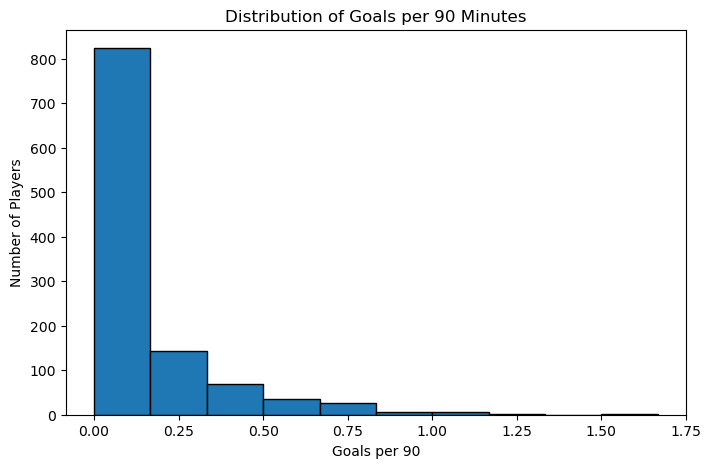

In [10]:
# Step 4 – Univariate analysis: distribution of Goals per 90
plt.figure(figsize=(8,5))
plt.hist(df_features['Goals_per_90'].dropna(), bins=10, edgecolor='black')
plt.title('Distribution of Goals per 90 Minutes')
plt.xlabel('Goals per 90')
plt.ylabel('Number of Players')
plt.show()

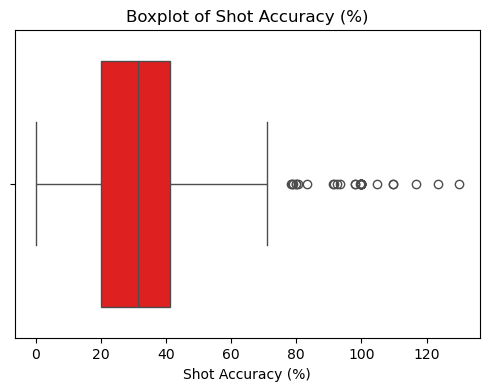

In [11]:
# Step 5 – Univariate analysis: Shot Accuracy boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=df_features['Shot_Accuracy'], color='red')
plt.title('Boxplot of Shot Accuracy (%)')
plt.xlabel('Shot Accuracy (%)')
plt.show()

**Findings:**
- The visualisation of *Goals per 90 Minutes* shows that the majority of players score fewer than 0.3 goals per match, with very few outliers scoring more than 1.0.  
- The *Shot Accuracy* boxplot shows wide variability and several extreme outliers, which suggests either incredible or inconsistent shooting. 

### 4.3 Bivariate Analysis

We then explored relationships between the key performance variables using scatter plots and correlation heatmaps.

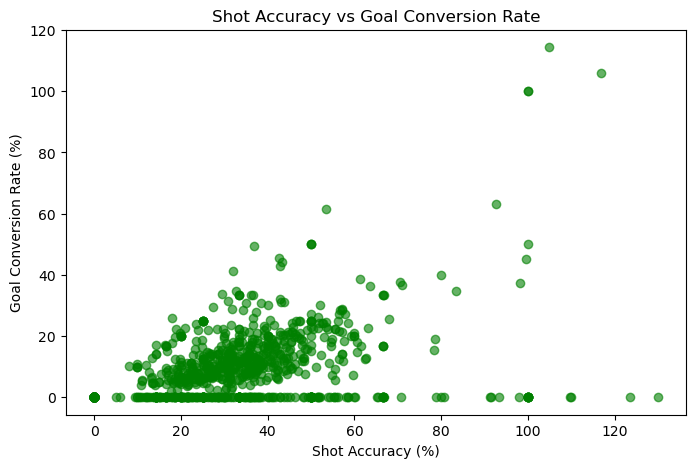

In [12]:
# Step 6 – Bivariate analysis: Shot Accuracy vs Goal Conversion Rate
plt.figure(figsize=(8,5))
plt.scatter(df_features['Shot_Accuracy'], df_features['Goal_Conversion_Rate'],
            color='green', alpha=0.6)
plt.title('Shot Accuracy vs Goal Conversion Rate')
plt.xlabel('Shot Accuracy (%)')
plt.ylabel('Goal Conversion Rate (%)')
plt.show()

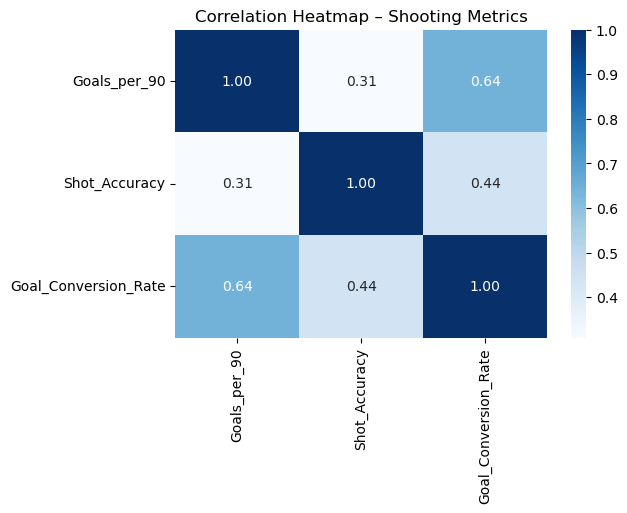

In [13]:
# Step 7 – Correlation heatmap
corr = df_features[['Goals_per_90', 'Shot_Accuracy', 'Goal_Conversion_Rate']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Heatmap – Shooting Metrics')
plt.show()

**Insights:**
- **Shot Accuracy vs Goal Conversion Rate:** This shows a moderately positive relationship. Players with better shooting accuracy generally have higher goal conversion, though some variability exists.  
- **Correlation Heatmap Findings:**  
  - *Goals per 90* ↔ *Goal Conversion Rate* (0.64): Strong positive relationship, great finishers tend to score more regularly.  
  - *Shot Accuracy* ↔ *Goal Conversion Rate* (0.44): Moderate relationship, strong shooting accuracy supports higher goal conversion.  
  - *Goals per 90* ↔ *Shot Accuracy* (0.31): Weak correlation, good accuracy does not guarantee a high number of goals.  

### 4.4 Summary of EDA Findings

- We can see that most players have a low scoring rate, with only a few high-performing outliers.  
- Shot Accuracy and Goal Conversion show a moderate correlation, although accuracy alone has limited predictive power.  
- These trends mirror real football dynamics: forwards dominate goal-related metrics such as goals and shots, while defensive players contribute far less in scoring.  

### 4.5 Top Player Comparison

From the new features I created, a few players clearly stand out. Some have very high Goals per 90 (such as Alejo Véliz in our cleaned dataset), showing they score often even if they play limited minutes. Others have a high Goal Conversion Rate (such as Hannibal Mejbri II in our cleaned dataset, who is a deep-lying midfielder and doesn’t take many shots), meaning they are very clinical finishers. This shows the difference between players who take lots of shots, like forwards, and players who are extremely efficient with fewer chances, such as defenders or midfielders.

## Part 5 – Ethics and Quality Reflection

For the final part of this assignment, I reflect on data quality, ethical considerations, and the responsibility involved when handling this dataset in the analysis.

### Main Data Quality Issues and Solutions

The original dataset we started with (`player_shooting_2023_2024_messy copy.csv`) had many quality issues after we intentionally altered it with the help of ChatGPT. These included:

- **Unnamed index column:** Removed to avoid duplication.  
- **Missing numerical values:** Filled the blank spaces with the mean of each column to maintain statistical consistency.  
- **Inconsistent date formats:** Ensured all dates were converted into the same format.  
- **Duplicate rows:** Found and removed any duplicate rows.  
- **Irregular data types:** Checked and fixed where necessary.  

This cleaning process was important to improve dataset reliability, prevent calculation errors, and ensure that summary statistics accurately reflected player performance.

### Sensitive or Personally Identifiable Data

- The original dataset from Kaggle only contained **public football performance statistics** such as goals, shots, and accuracy rates.  
- There is no private information such as emails, addresses, contact details, medical information, or financial details.  
- All names in the dataset are either generated by ChatGPT or belong to **public-domain professional athletes**, meaning they are not confidential or personally sensitive.

### Ethical Handling of Data

I sourced the dataset from **Kaggle’s public football dataset**, which is free to use exclusively for educational and analytical purposes.  
I maintained ethical handling throughout this assignment by:

- Choosing a dataset that only includes publicly available, non-personal information.  
- Avoiding any manipulation or misrepresentation of player performance.  
- Ensuring transparency in data cleaning, transformation, and interpretation.
- Many Date_of_Birth values became NaT because the original dates were in mixed formats, and Python couldn’t reliably convert them, so they were safely set to NaT to avoid adding incorrect information.  
- Presenting my results objectively, without bias or unfair judgement.  

By doing this, I made sure to respect the data and uphold integrity throughout the analysis.

### Summary

- Throughout this assignment, I believe I have improved the dataset through systematic cleaning and validation steps.  
- I ensured that no sensitive or private information was used.  
- I also ensured that the entire analysis was carried out ethically, transparently, and in line with responsible data practices.  

In [14]:
# Export the cleaned dataset to CSV

df_features.to_csv("player_shooting_2023_2024_cleaned_with_features.csv", index=False)

print("Cleaned dataset exported successfully!")

Cleaned dataset exported successfully!


### Export of Cleaned Dataset
The cleaned dataset was exported from the notebook as `player_shooting_2023_2024_cleaned_with_features.csv` using the code above. This file is included with the submission as required.